# DS 7331 Data Mining: Lab 3 iPython Notebook
### Created On: March 29, 2019
## Authors:  
- Arora, Tanvi                
- Chandna, Rajat
- Henderson Kuns, Nicol
- Ramasundaram, Kumar
- Vasquez, James

## Table of Contents
- Business Understanding
- Import Modules
- Load Data

# Business Understanding 

Lots of verbiage goes here....Space is awesome pulsars are probably cool too

### Data Meaning Type
- **mean_intg** - Mean of the integrated profile.
- **sd_intg** - Standard deviation of the integrated profile. 
- **exc_kurt_intg** - Excess kurtosis of the integrated profile. 
- **skw_intg** - Skewness of the integrated profile. 
- **mean_dmsnr** - Mean of the DM-SNR curve.                               
- **sd_dmsnr** - Standard deviation of the DM-SNR curve. 
- **exc_kurt_dmsnr** - Excess kurtosis of the DM-SNR curve. 
- **skw_dmsnr** - Skewness of the DM-SNR curve. 
- **class** - class

### Import Modules

In [1]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

### Load Data

In [2]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/HTRU_2.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0

102.5078125,58.88243001,0.465318154,-0.515087909,1.677257525,14.86014572,10.57648674,127.3935796,0

103.015625,39.34164944,0.323328365,1.051164429,3.121237458,21.74466875,7.735822015,63.17190911,0

136.75,57.17844874,-0.068414638,-0.636238369,3.642976589,20.9592803,6.89649891,53.59366067,0

88.7265625,40.67222541,0.600866079,1.123491692,1.178929766,11.4687196,14.26957284,252.5673058,0



In [3]:
# Import the colon delimited data file into pandas dataFrame
pulsars_Df = pd.read_csv(pathOfDataFile, sep = ",", names= ["mean_intg", "sd_intg", "exc_kurt_intg", "skw_intg", "mean_dmsnr", \
                                      "sd_dmsnr", "exc_kurt_dmsnr", "skw_dmsnr", "class"])

pulsars_Df.head(7)

,mean_intg,sd_intg,exc_kurt_intg,skw_intg,mean_dmsnr,sd_dmsnr,exc_kurt_dmsnr,skw_dmsnr,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0


# Data Quality

In [4]:
pulsars_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_intg         17898 non-null float64
sd_intg           17898 non-null float64
exc_kurt_intg     17898 non-null float64
skw_intg          17898 non-null float64
mean_dmsnr        17898 non-null float64
sd_dmsnr          17898 non-null float64
exc_kurt_dmsnr    17898 non-null float64
skw_dmsnr         17898 non-null float64
class             17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Data Types for columns are matching as specified in data description. Columns containing numeric data are represented as of type "float64" and column containing class variable, a categorical variable is encoded in type "int64", in which value "0" means "No" - "Star is Not a pulsar" and "1" means "Yes" - "Star is a pulsar"

dtypes: float64(8), int64(1)

Also, number of entries in all columns is same, signalling that either data contains no missing values or missing values have been already replaced with some specific values(eg -1,999 or mean/median of the series etc). Next we would try to uncover details on these missing values.

In [5]:
# To find any missing values
pulsars_Df.isnull().any()

mean_intg         False
sd_intg           False
exc_kurt_intg     False
skw_intg          False
mean_dmsnr        False
sd_dmsnr          False
exc_kurt_dmsnr    False
skw_dmsnr         False
class             False
dtype: bool

**There are no missing values for any observations/rows in our data set.**

In [6]:
# To find duplicated rows in data Frame
pulsars_Df.duplicated().any()

False

**There are no duplicate values for any observations/rows in our data set.**

In [7]:
pulsars_Df.describe()

,mean_intg,sd_intg,exc_kurt_intg,skw_intg,mean_dmsnr,sd_dmsnr,exc_kurt_dmsnr,skw_dmsnr,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


## Outlier Analysis

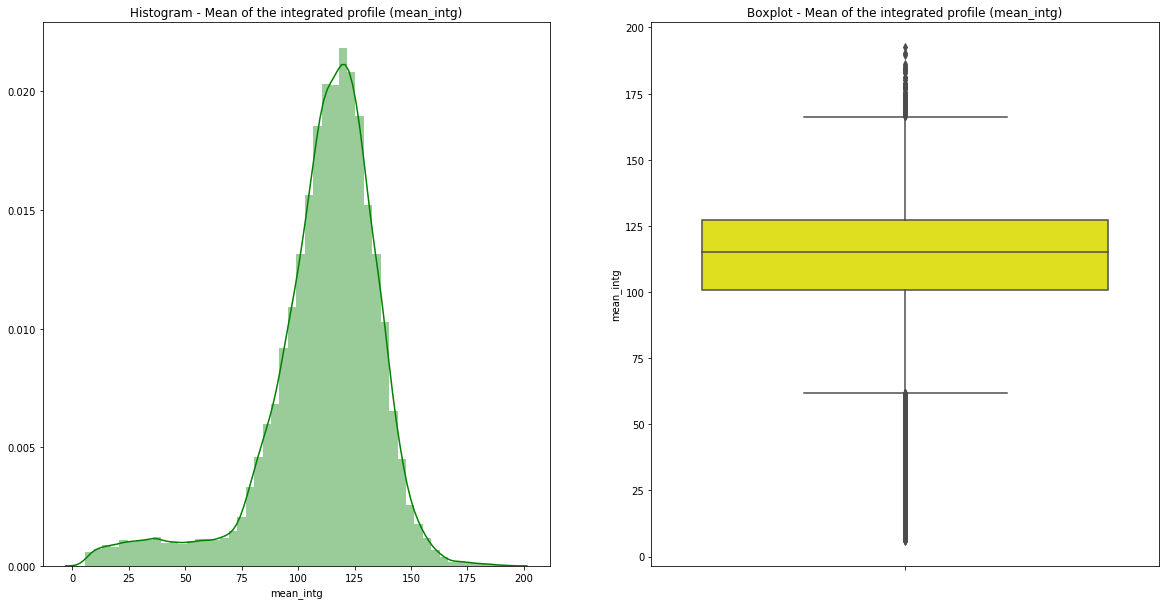

In [8]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Mean of the integrated profile (mean_intg)")
sns.distplot(pulsars_Df['mean_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Mean of the integrated profile (mean_intg)")
sns.boxplot(x = 'mean_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

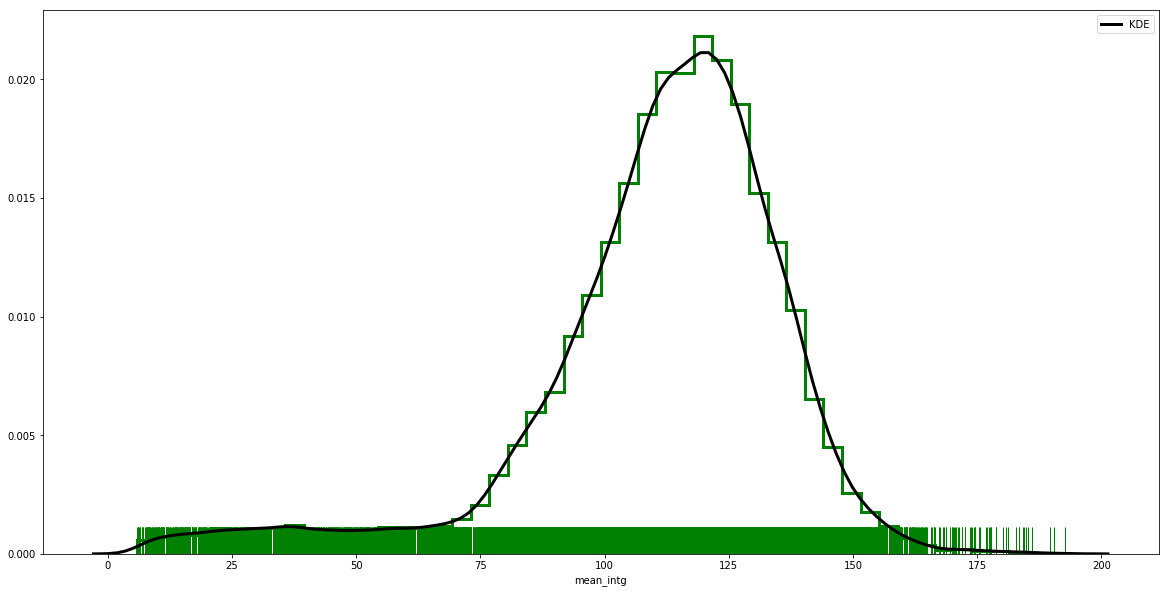

In [9]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['mean_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()


In [10]:
# Check how many values of mean_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['mean_intg']) - (3 * np.std(pulsars_Df['mean_intg']))
b = np.mean(pulsars_Df['mean_intg']) + (3 * np.std(pulsars_Df['mean_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_intg'] > b]['class'].count())

Number of values under 3 Std. = 451
Number of values above 3 Std. = 3


In [11]:
c = pulsars_Df[pulsars_Df['mean_intg'] < a]['class'].count()
d = sum(pulsars_Df[pulsars_Df['mean_intg'] < a]['class'])
print("Percentage of values of class 0 under 3 Std. of mean_intg Variable = %s" %((c - d)/c))
print("Percentage of values of class 1 under 3 Std. of mean_intg Variable = %s" %((d)/c))

Percentage of values of class 0 under 3 Std. of mean_intg Variable = 0.008869179600886918
Percentage of values of class 1 under 3 Std. of mean_intg Variable = 0.991130820399113


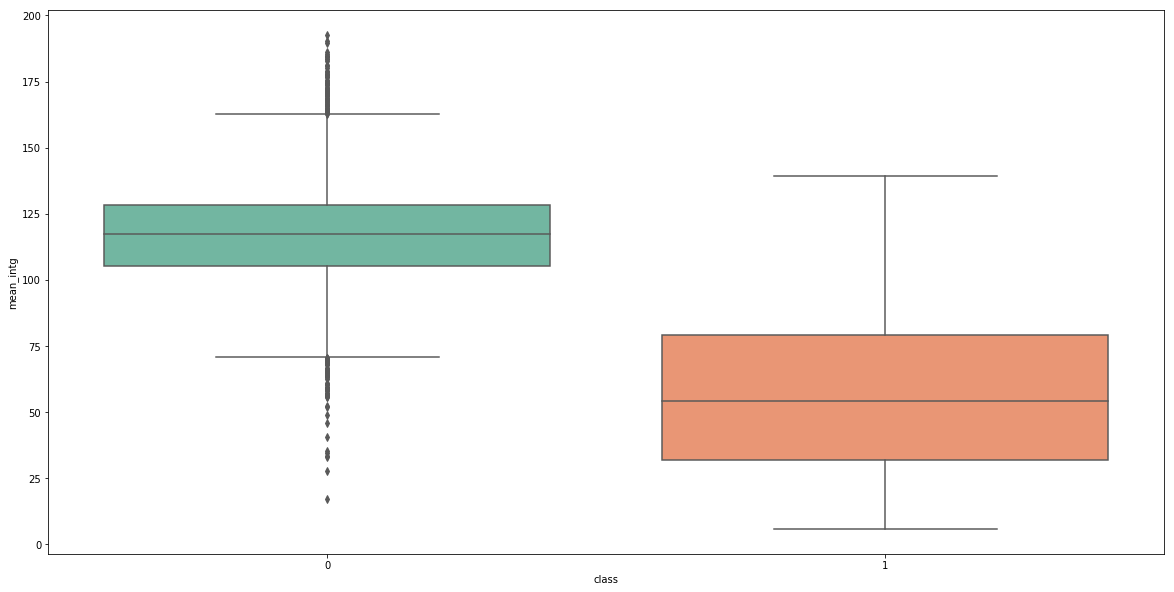

In [12]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'mean_intg', data=pulsars_Df)
plt.show()

In [13]:
# Values of mean_intg variable over 3 std of mean
pulsars_Df[pulsars_Df['mean_intg'] > b]

,mean_intg,sd_intg,exc_kurt_intg,skw_intg,mean_dmsnr,sd_dmsnr,exc_kurt_dmsnr,skw_dmsnr,class
4548,190.421875,59.106447,-1.517159,1.497580,95.719900,97.754509,0.058366,-1.964998,0
6564,189.734375,59.578268,-1.641515,1.868564,147.019231,76.999786,-0.898056,-0.649195,0
15687,192.617188,56.926093,-1.876011,2.444698,20.024247,53.103249,2.764809,6.341108,0


-- Var 1 Ends --

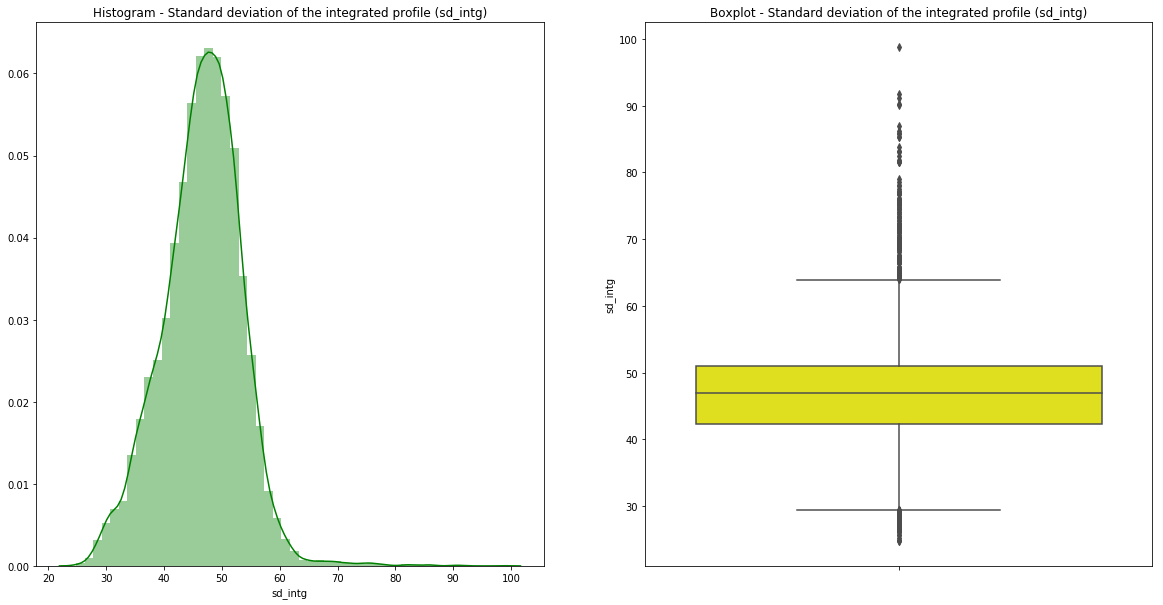

In [14]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Standard deviation of the integrated profile (sd_intg)")
sns.distplot(pulsars_Df['sd_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Standard deviation of the integrated profile (sd_intg)")
sns.boxplot(x = 'sd_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

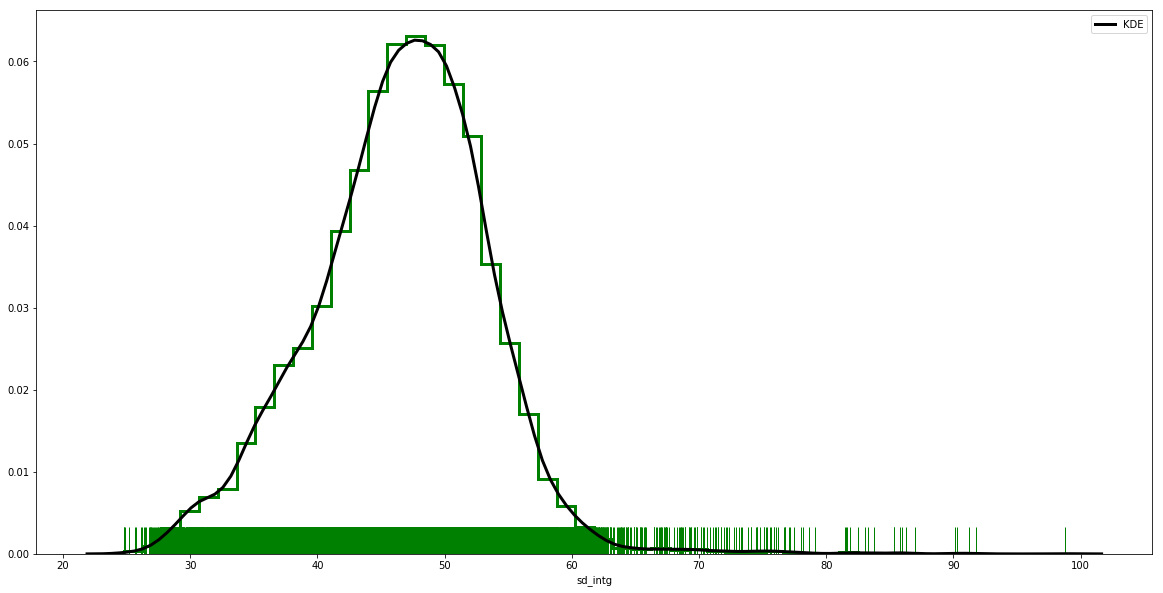

In [15]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['sd_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()


In [16]:
# Check how many values of sd_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['sd_intg']) - (3 * np.std(pulsars_Df['sd_intg']))
b = np.mean(pulsars_Df['sd_intg']) + (3 * np.std(pulsars_Df['sd_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_intg'] > b]['class'].count())

Number of values under 3 Std. = 6
Number of values above 3 Std. = 99


In [17]:
# Taking random 20 obs over 3 std for manual inspection
pulsars_Df[pulsars_Df['sd_intg'] > b].head(20)

,mean_intg,sd_intg,exc_kurt_intg,skw_intg,mean_dmsnr,sd_dmsnr,exc_kurt_dmsnr,skw_dmsnr,class
370,107.539062,86.951396,-0.008928,-1.676724,211.948997,54.010310,-2.556795,5.768458,0
525,119.367188,71.516046,0.061737,-1.383625,0.886288,9.267690,19.865582,493.538840,0
544,120.539062,71.487313,0.066583,-1.237876,1.568562,15.701101,11.669448,146.713841,0
758,59.351562,76.784458,1.536309,0.736696,0.636288,10.566986,21.017232,466.135457,0
893,136.828125,67.336504,-0.257778,-1.276375,0.962375,8.426909,23.742638,691.196174,0
961,162.039062,67.439371,-0.911776,-0.229593,0.807692,10.852915,21.274814,483.251270,0
1124,118.984375,77.139786,0.173310,-1.501641,0.836957,11.997185,17.941527,340.366461,0
1233,144.945312,70.872388,-0.359561,-1.011004,7.689799,37.922381,5.006665,24.171402,0
1235,130.406250,72.400949,-0.020930,-1.267204,5.086957,27.146896,6.109138,38.936796,0
1236,74.632812,75.867161,0.834880,-0.838742,67.623746,81.199889,0.998825,-0.311267,0


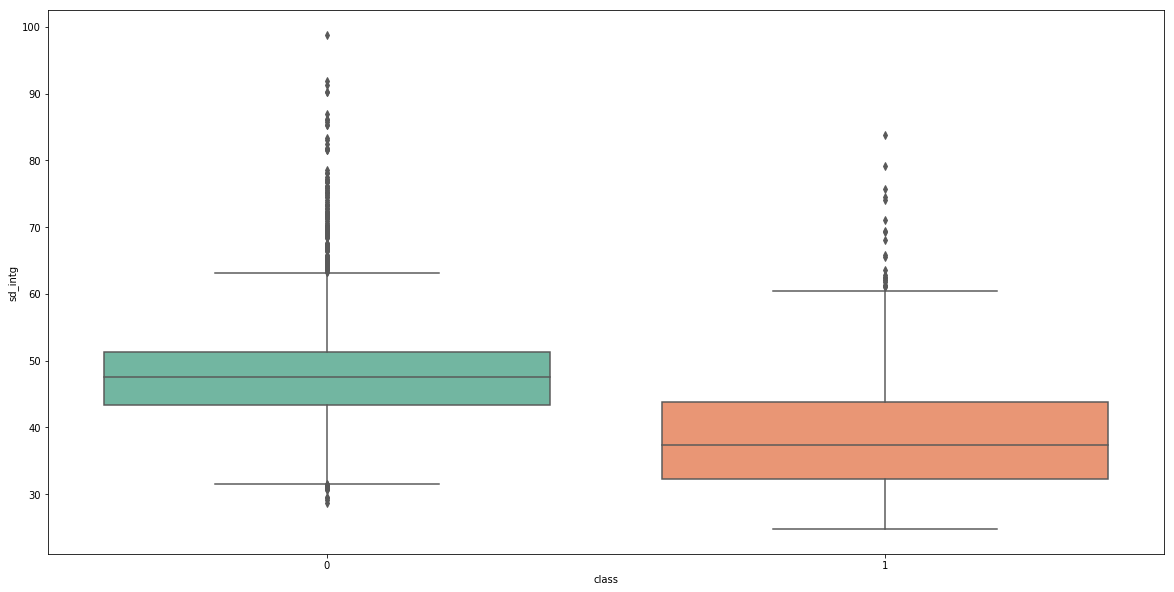

In [18]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'sd_intg', data=pulsars_Df)
plt.show()

--Var 2 Ends -- 

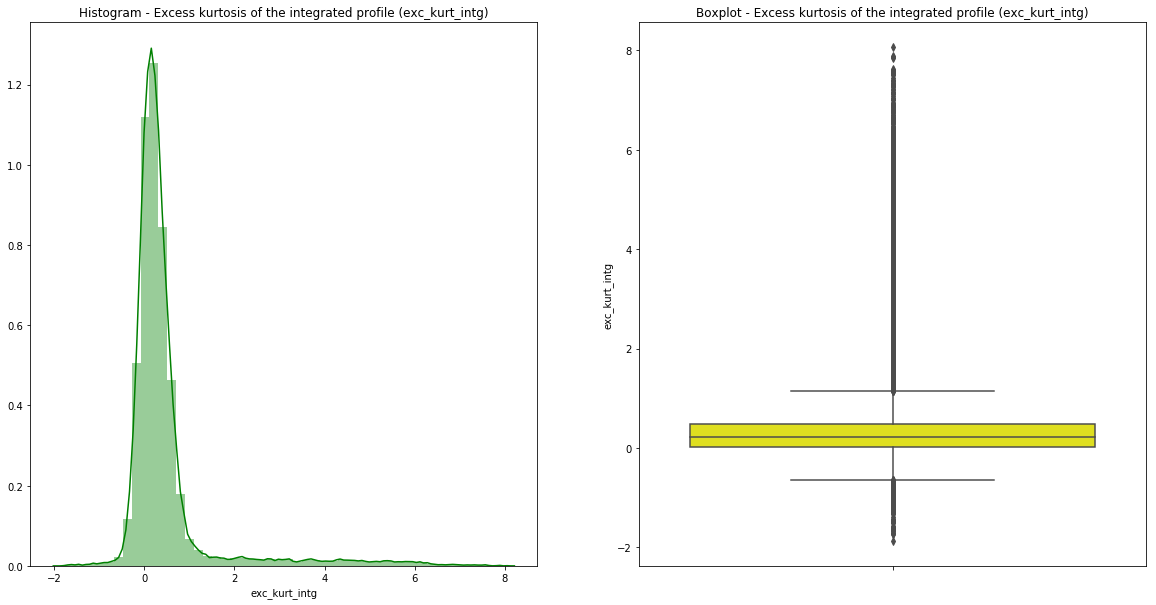

In [19]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Excess kurtosis of the integrated profile (exc_kurt_intg)")
sns.distplot(pulsars_Df['exc_kurt_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Excess kurtosis of the integrated profile (exc_kurt_intg)")
sns.boxplot(x = 'exc_kurt_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

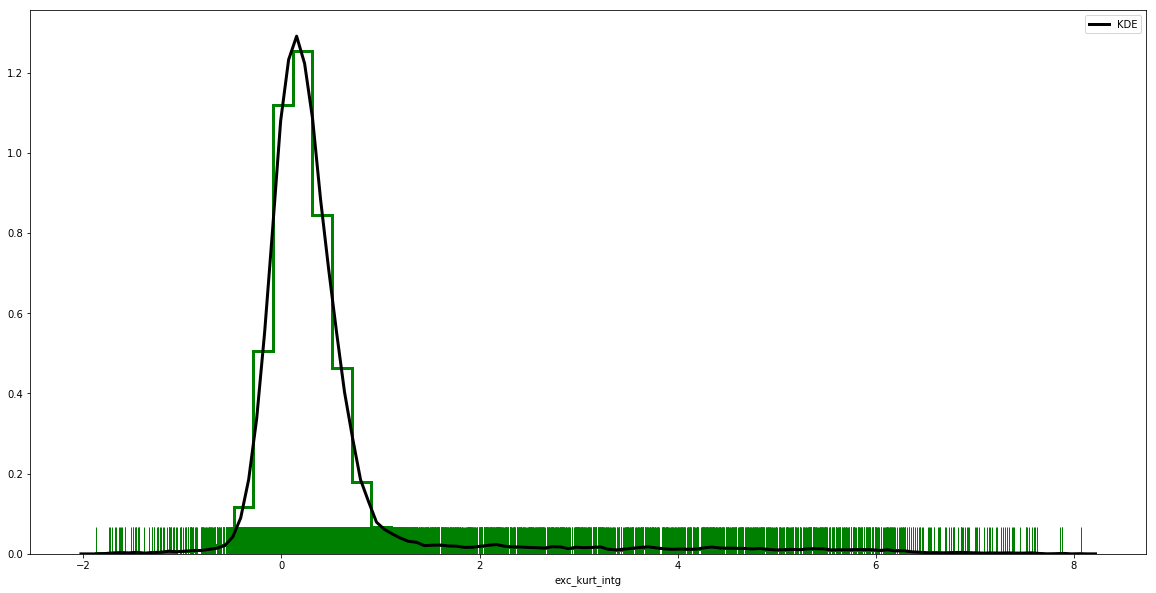

In [20]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['exc_kurt_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [21]:
# Check how many values of exc_kurt_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['exc_kurt_intg']) - (3 * np.std(pulsars_Df['exc_kurt_intg']))
b = np.mean(pulsars_Df['exc_kurt_intg']) + (3 * np.std(pulsars_Df['exc_kurt_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['exc_kurt_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['exc_kurt_intg'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 636


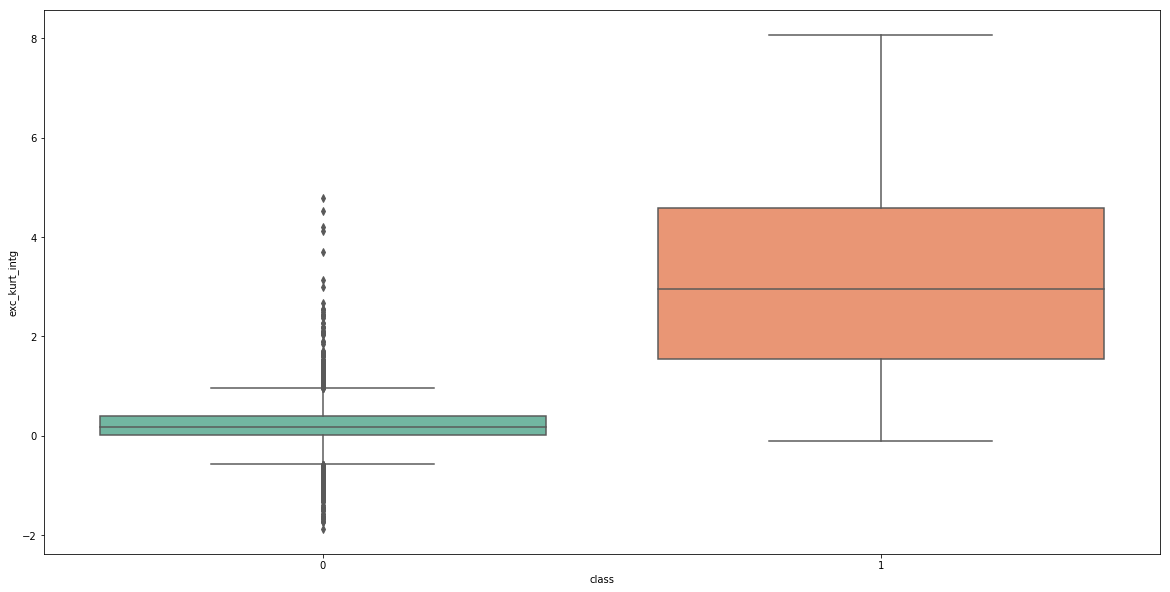

In [22]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'exc_kurt_intg', data=pulsars_Df)
plt.show()

-- Var 3 Ends -- 

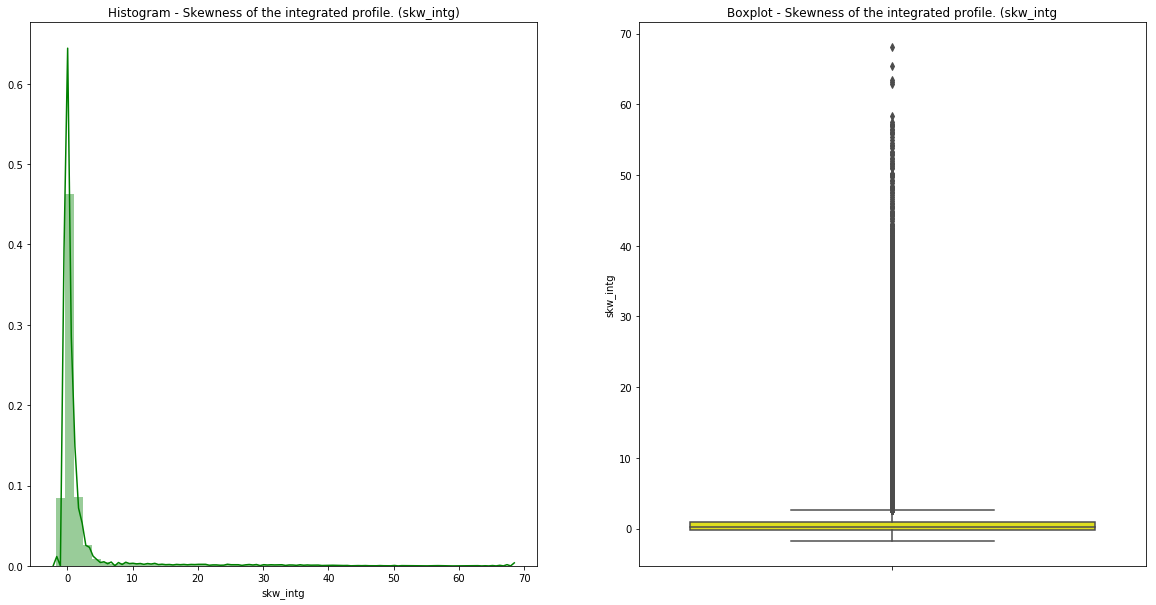

In [23]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Skewness of the integrated profile. (skw_intg)")
sns.distplot(pulsars_Df['skw_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Skewness of the integrated profile. (skw_intg")
sns.boxplot(x = 'skw_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

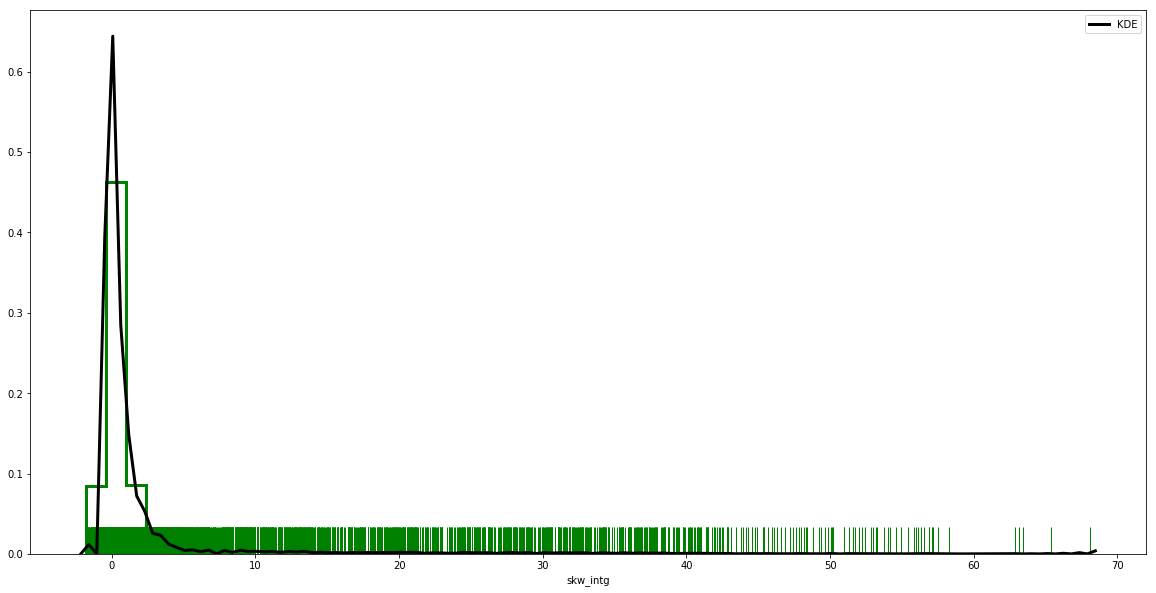

In [24]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['skw_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [25]:
# Check how many values of skw_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['skw_intg']) - (3 * np.std(pulsars_Df['skw_intg']))
b = np.mean(pulsars_Df['skw_intg']) + (3 * np.std(pulsars_Df['skw_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['skw_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['skw_intg'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 526


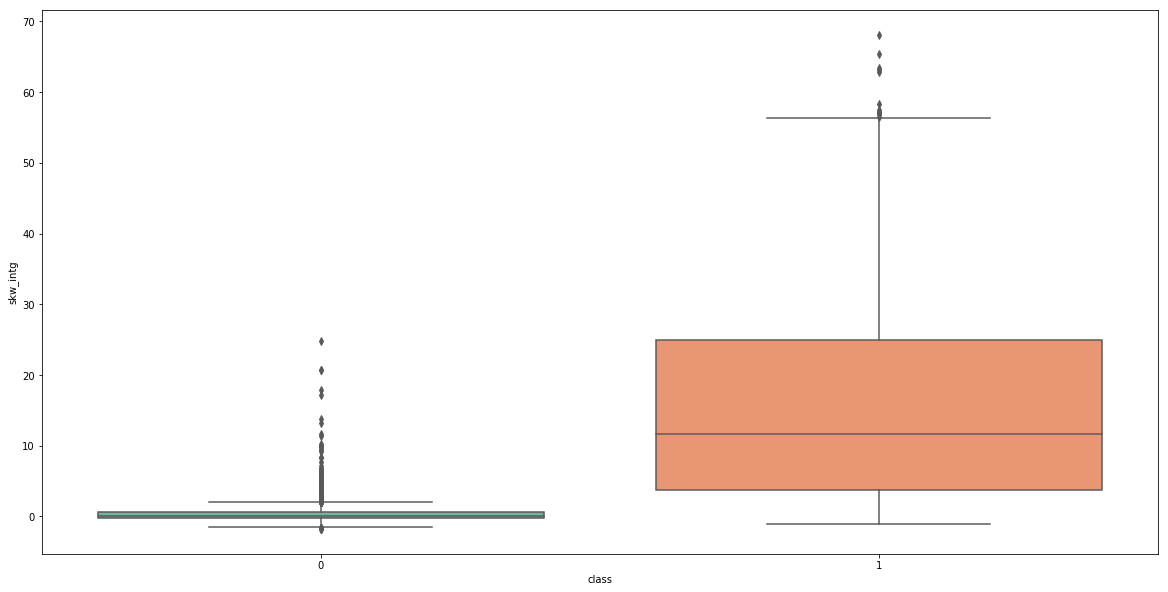

In [26]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'skw_intg', data=pulsars_Df)
plt.show()

--Var 4 End --

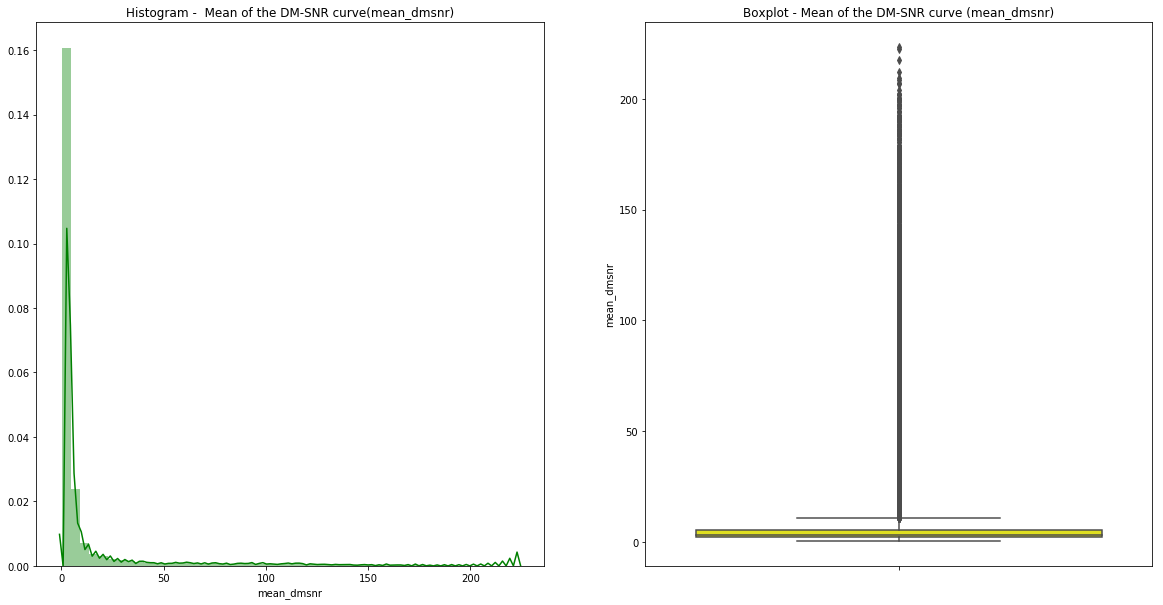

In [27]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram -  Mean of the DM-SNR curve(mean_dmsnr)")
sns.distplot(pulsars_Df['mean_dmsnr'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Mean of the DM-SNR curve (mean_dmsnr)")
sns.boxplot(x = 'mean_dmsnr', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

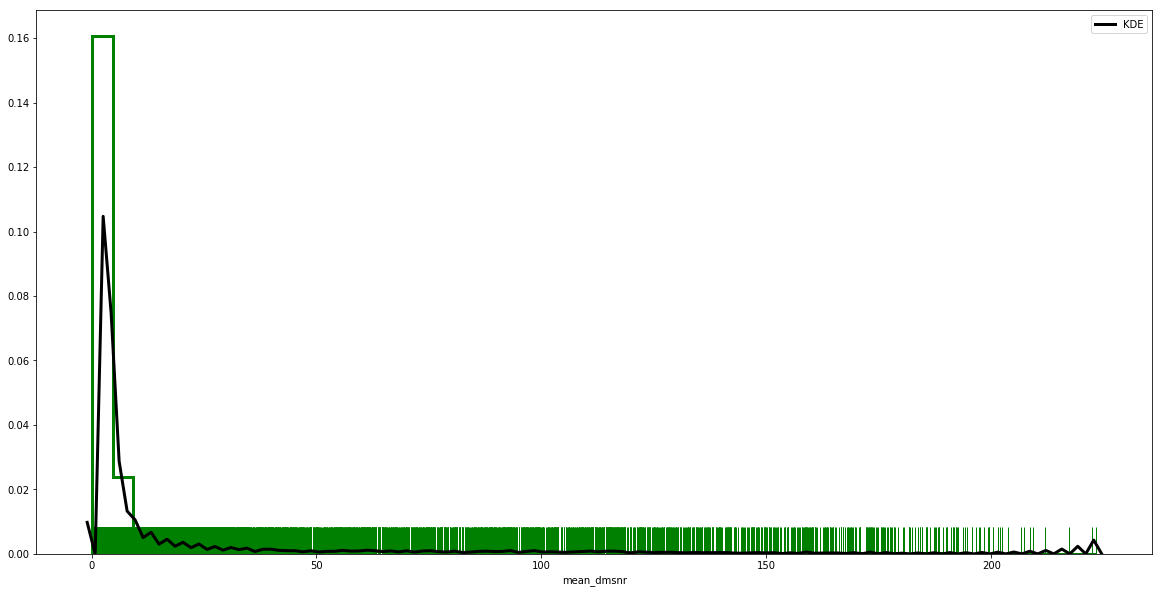

In [28]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['mean_dmsnr'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [29]:
# Check how many values of mean_dmsnr variable are over or below 3 std deviations
a = np.mean(pulsars_Df['mean_dmsnr']) - (3 * np.std(pulsars_Df['mean_dmsnr']))
b = np.mean(pulsars_Df['mean_dmsnr']) + (3 * np.std(pulsars_Df['mean_dmsnr']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_dmsnr'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_dmsnr'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 654


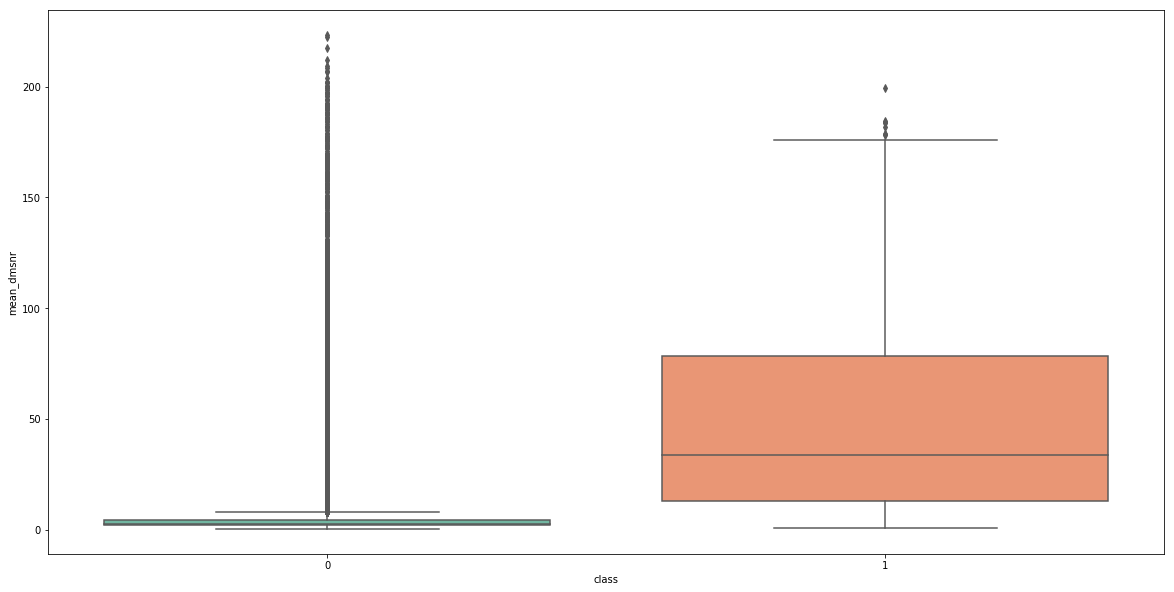

In [30]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'mean_dmsnr', data=pulsars_Df)
plt.show()

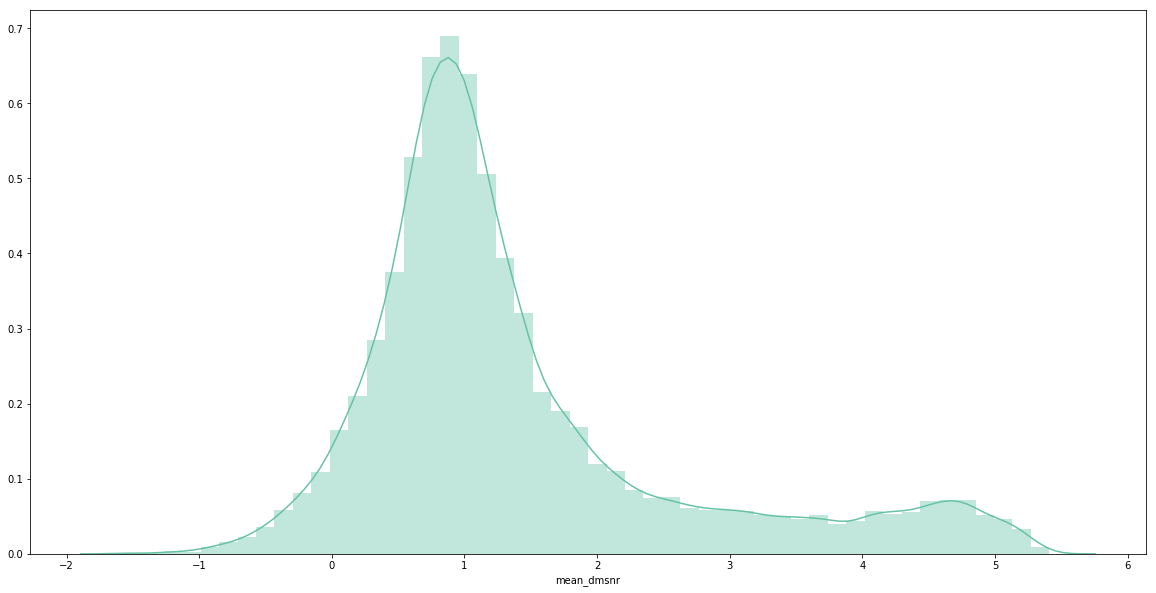

In [31]:
# Taking log of mean_dmsnr variable
fig, axes = plt.subplots(1,1,figsize = (20,10))
sns.distplot(np.log(pulsars_Df['mean_dmsnr']),kde=True, ax=axes)
plt.show()

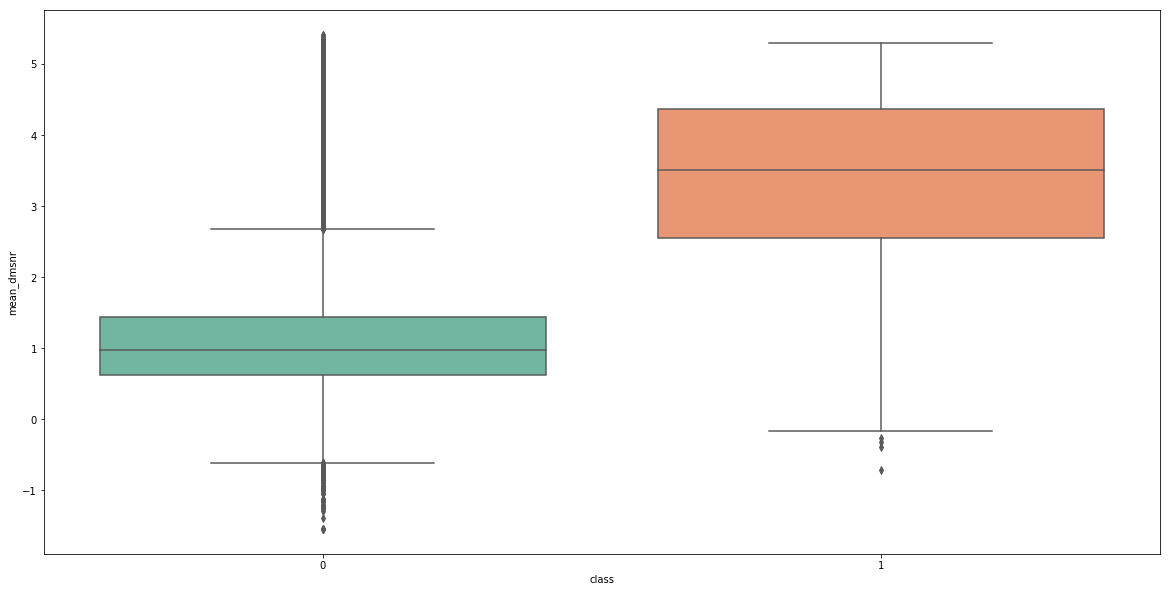

In [32]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = np.log(pulsars_Df['mean_dmsnr']), data=pulsars_Df)
plt.show()

-- Var 5 Ends --

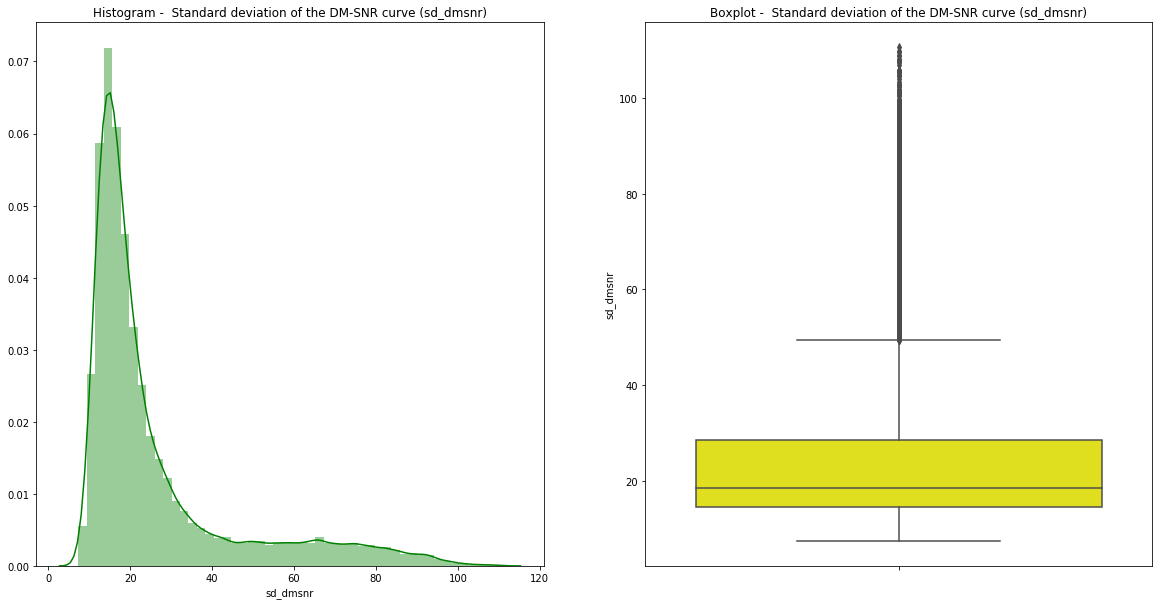

In [33]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram -  Standard deviation of the DM-SNR curve (sd_dmsnr)")
sns.distplot(pulsars_Df['sd_dmsnr'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot -  Standard deviation of the DM-SNR curve (sd_dmsnr)")
sns.boxplot(x = 'sd_dmsnr', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

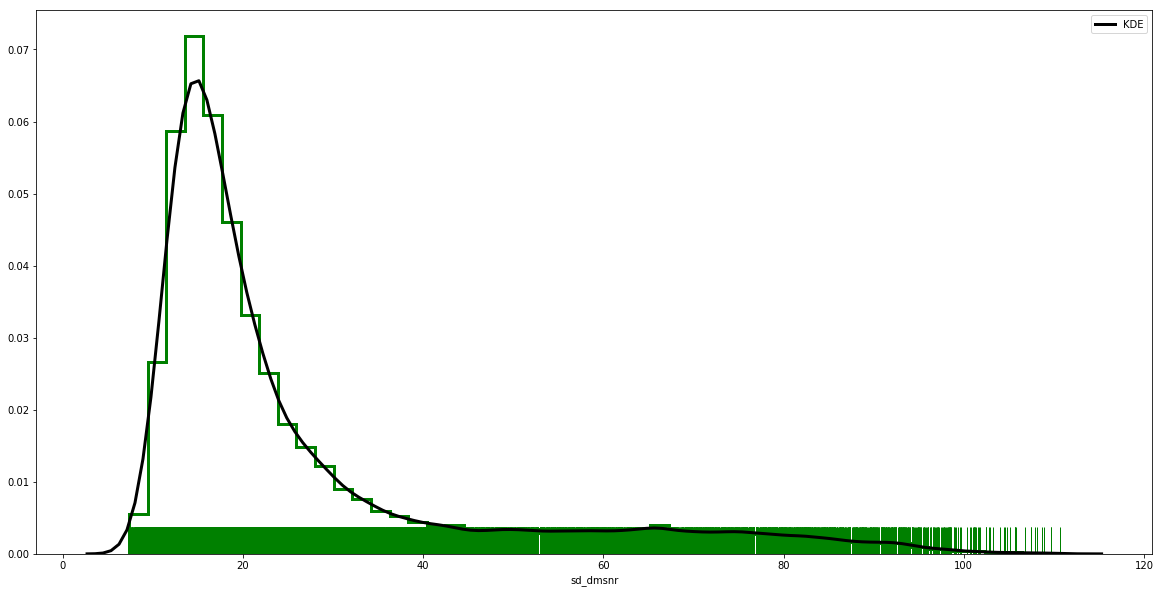

In [34]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['sd_dmsnr'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [35]:
# Check how many values of sd_dmsnr variable are over or below 3 std deviations
a = np.mean(pulsars_Df['sd_dmsnr']) - (3 * np.std(pulsars_Df['sd_dmsnr']))
b = np.mean(pulsars_Df['sd_dmsnr']) + (3 * np.std(pulsars_Df['sd_dmsnr']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_dmsnr'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_dmsnr'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 406


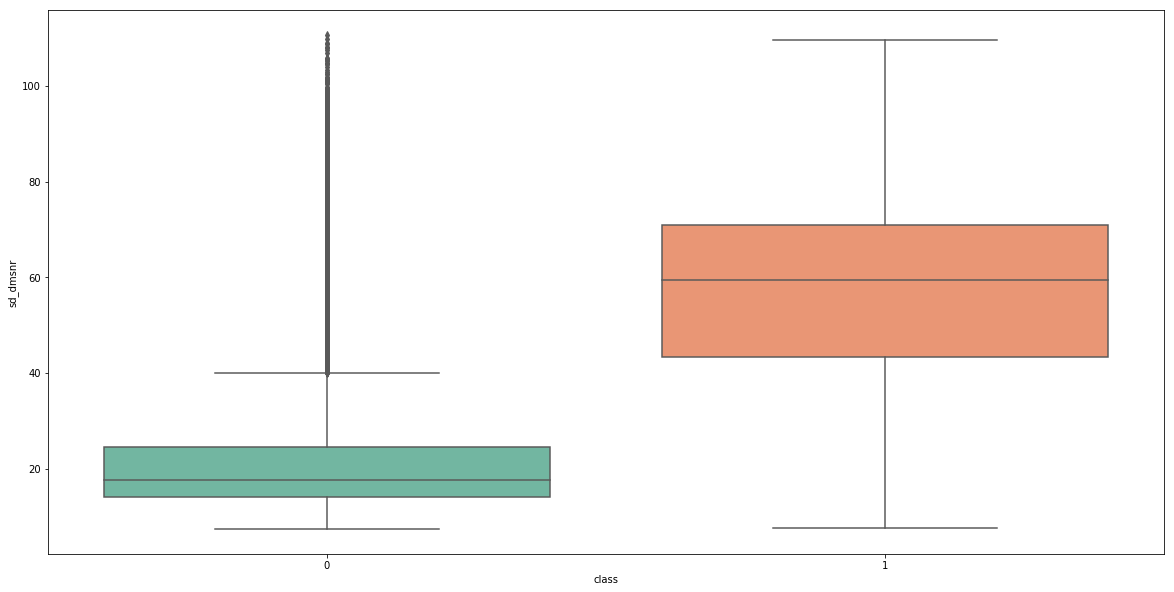

In [36]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = pulsars_Df['sd_dmsnr'], data=pulsars_Df)
plt.show()

In [37]:
# Looking at 25 values at random that are greater than 3 std.
pulsars_Df[pulsars_Df['sd_dmsnr'] > b].head(25)

,mean_intg,sd_intg,exc_kurt_intg,skw_intg,mean_dmsnr,sd_dmsnr,exc_kurt_dmsnr,skw_dmsnr,class
134,126.398438,60.418248,0.048077,-0.814893,66.547659,85.322761,0.750702,-1.037197,0
359,60.632812,47.564737,2.401281,5.858265,93.586957,89.542258,0.383887,-1.319026,1
364,169.539062,57.060673,-1.082567,0.624954,127.636288,94.410682,-0.276185,-1.578509,0
447,86.218750,53.083357,0.972318,0.341129,139.614549,101.090779,-0.612073,-1.548335,0
505,42.023438,33.027088,3.668886,19.648005,87.904682,86.479951,0.259049,-1.504341,1
673,147.523438,52.398856,-0.440764,-0.210694,79.328595,93.943998,0.481280,-1.551990,0
688,57.398438,44.955245,2.638750,7.709673,59.050167,85.546869,1.141041,-0.250512,1
709,137.875000,51.161967,0.015710,-0.306694,77.465719,89.397611,0.463503,-1.551208,0
784,160.601562,54.810802,-1.130722,0.991810,135.439799,95.842195,-0.424526,-1.492953,0
787,137.343750,52.050822,-0.400641,-0.119314,105.989130,91.672115,0.003882,-1.648097,0


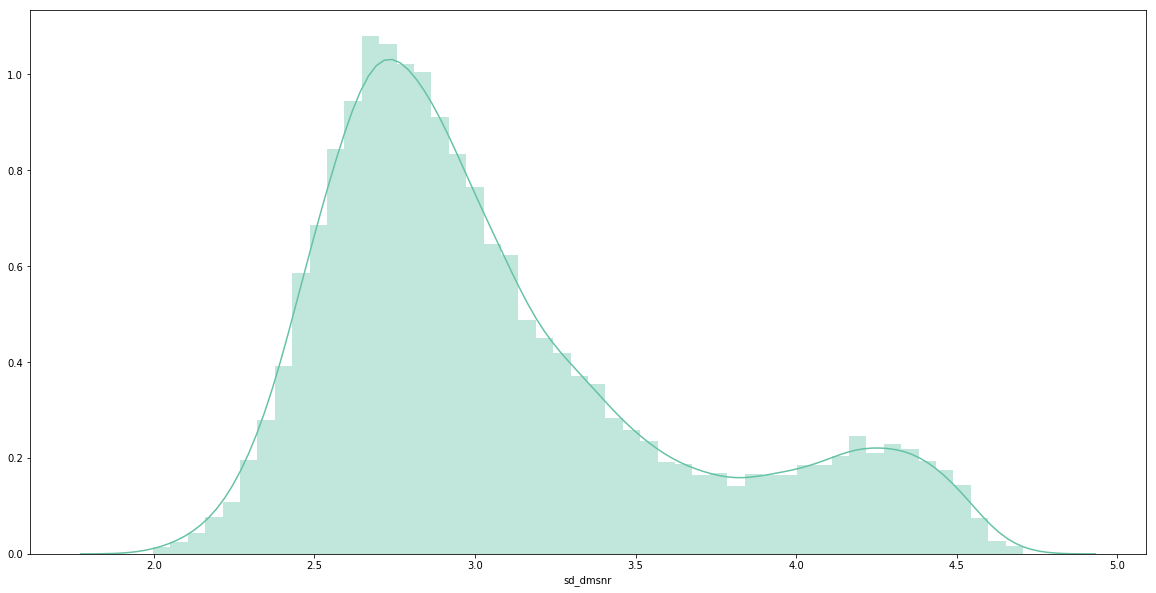

In [38]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
sns.distplot(np.log(pulsars_Df['sd_dmsnr']),kde=True, ax=axes)
plt.show()

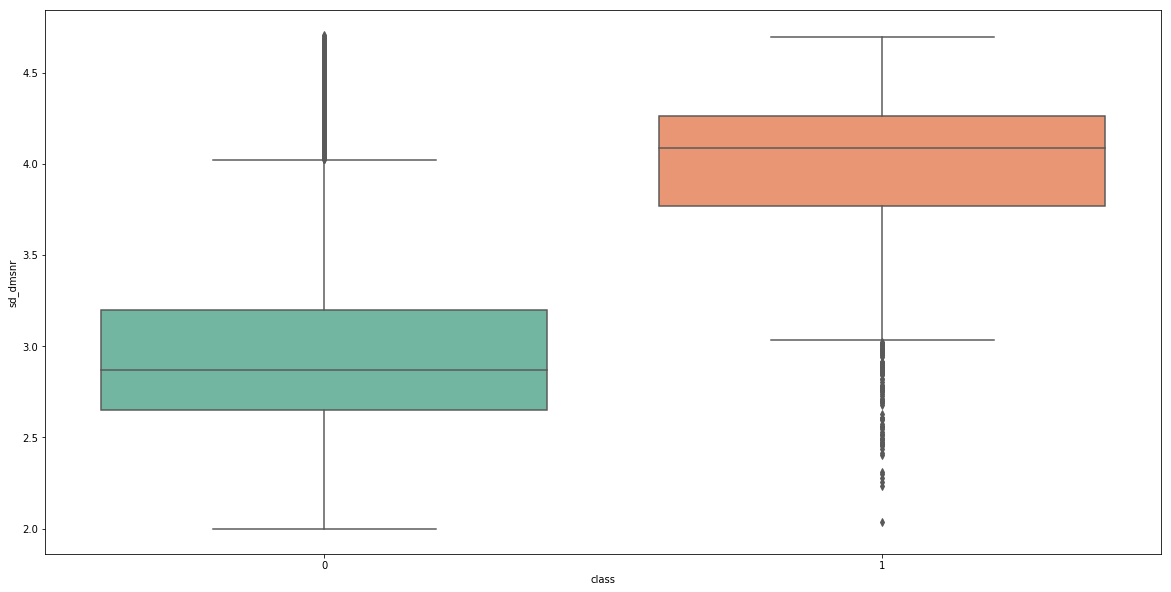

In [39]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = np.log(pulsars_Df['sd_dmsnr']), data=pulsars_Df)
plt.show()

--  Var 6 Ends --

In [60]:
imputedPulsarDf = pulsars_Df.copy()
imputedPulsarDf['log_mean_dmsnr'] = np.log(imputedPulsarDf['mean_dmsnr'])
imputedPulsarDf['log_sd_dmsnr'] = np.log(imputedPulsarDf['sd_dmsnr'])
imputedPulsarDf.drop(['sd_dmsnr', 'mean_dmsnr'], axis = 1, inplace = True)
imputedPulsarDf.describe()

,mean_intg,sd_intg,exc_kurt_intg,skw_intg,exc_kurt_dmsnr,skw_dmsnr,class,log_mean_dmsnr,log_sd_dmsnr
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,8.303556,104.857709,0.091574,1.390669,3.079164
std,25.652935,6.843189,1.064040,6.167913,4.506092,106.514540,0.288432,1.235812,0.572203
min,5.812500,24.772042,-1.876011,-1.791886,-3.139270,-1.976976,0.000000,-1.545474,1.997476
25%,100.929688,42.376018,0.027098,-0.188572,5.781506,34.960504,0.000000,0.653926,2.669817
50%,115.078125,46.947479,0.223240,0.198710,8.433515,83.064556,0.000000,1.030276,2.915677
75%,127.085938,51.023202,0.473325,0.927783,10.702959,139.309331,0.000000,1.698228,3.347378
max,192.617188,98.778911,8.069522,68.101622,34.539844,1191.000837,1.000000,5.408929,4.706302


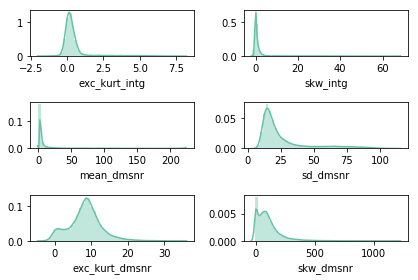

In [40]:
f,axes = plt.subplots(3,2)
sns.distplot(pulsars_Df['exc_kurt_intg'],kde=True, ax=axes[0,0])
sns.distplot(pulsars_Df['skw_intg'],kde=True, ax=axes[0,1])
sns.distplot(pulsars_Df['mean_dmsnr'],kde=True, ax=axes[1,0])
sns.distplot(pulsars_Df['sd_dmsnr'],kde=True, ax=axes[1,1])
sns.distplot(pulsars_Df['exc_kurt_dmsnr'],kde=True, ax=axes[2,0])
sns.distplot(pulsars_Df['skw_dmsnr'],kde=True, ax=axes[2,1])
plt.tight_layout()

## Pairs Plot

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


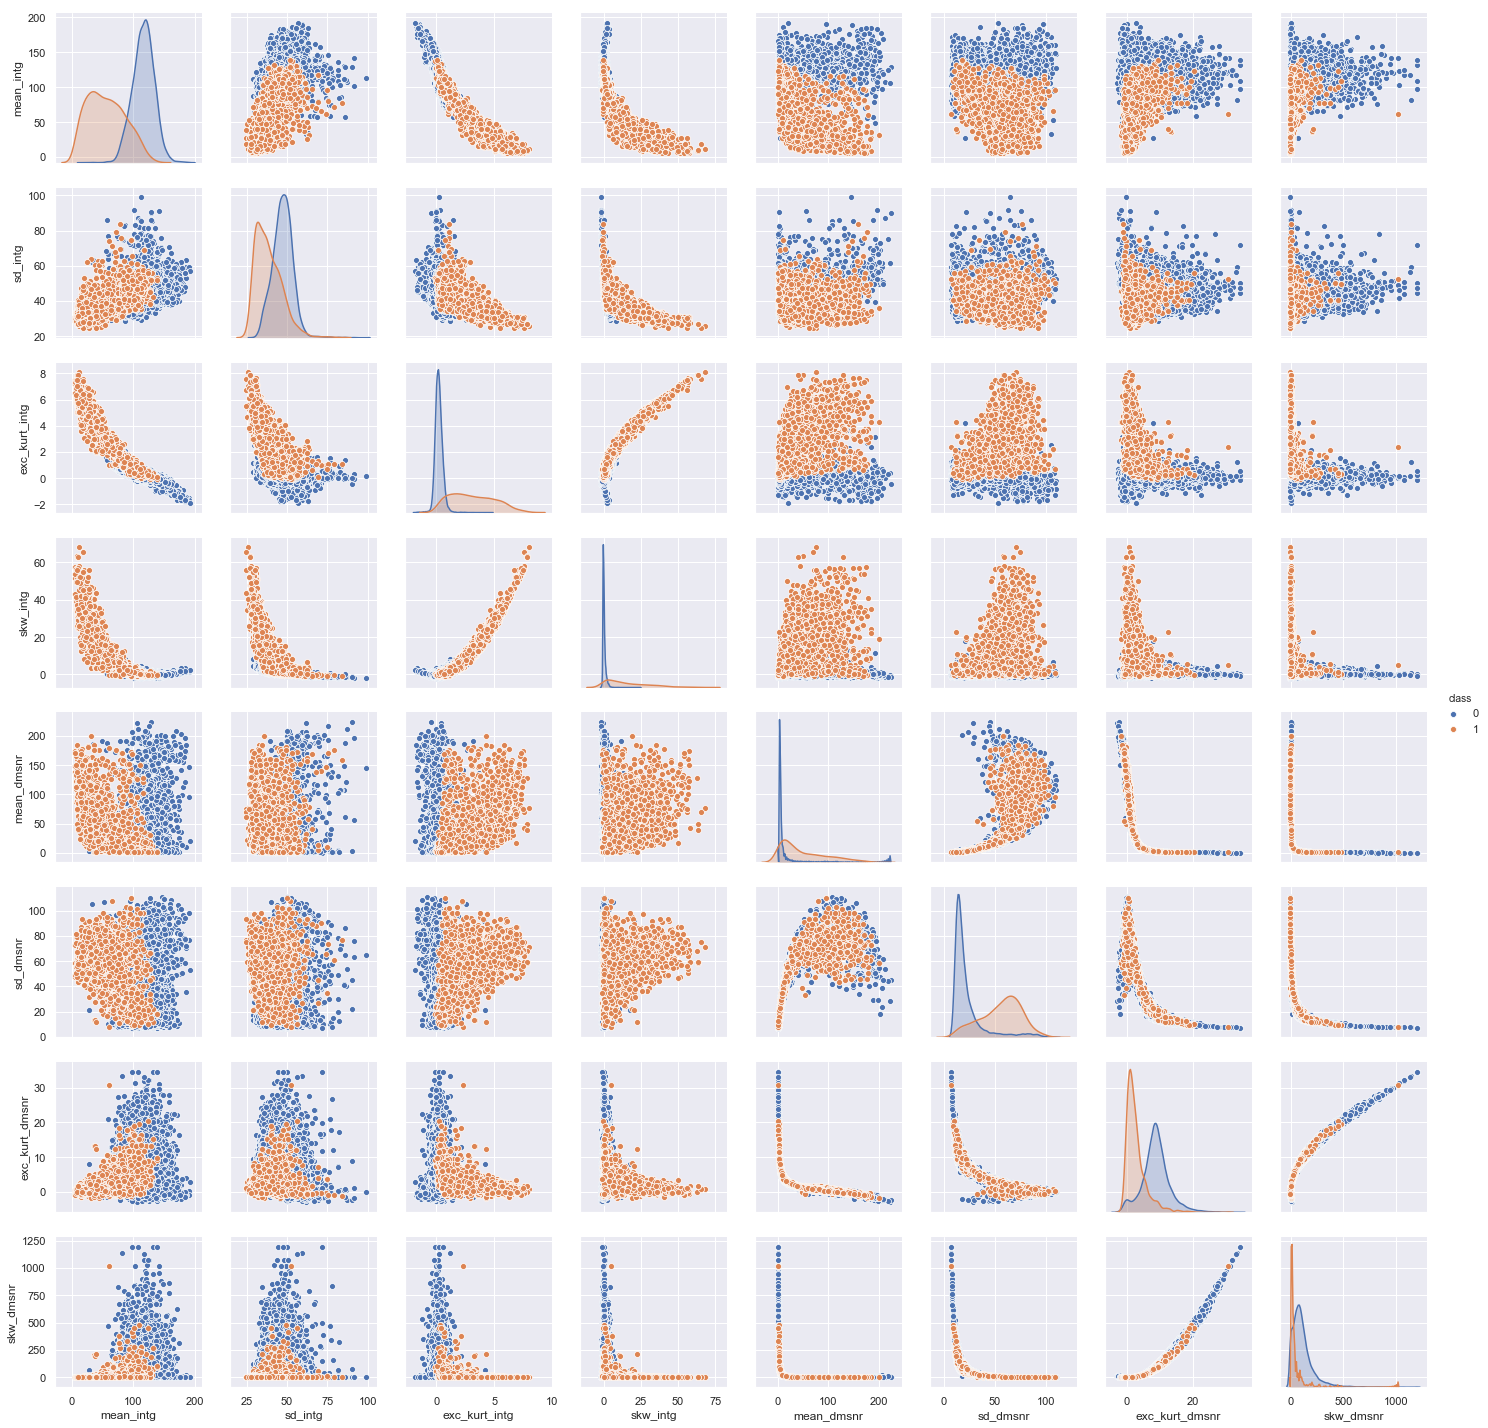

In [56]:
%time
sns.pairplot(data = pulsars_Df, vars=pulsars_Df.drop('class', axis = 1), hue='class')

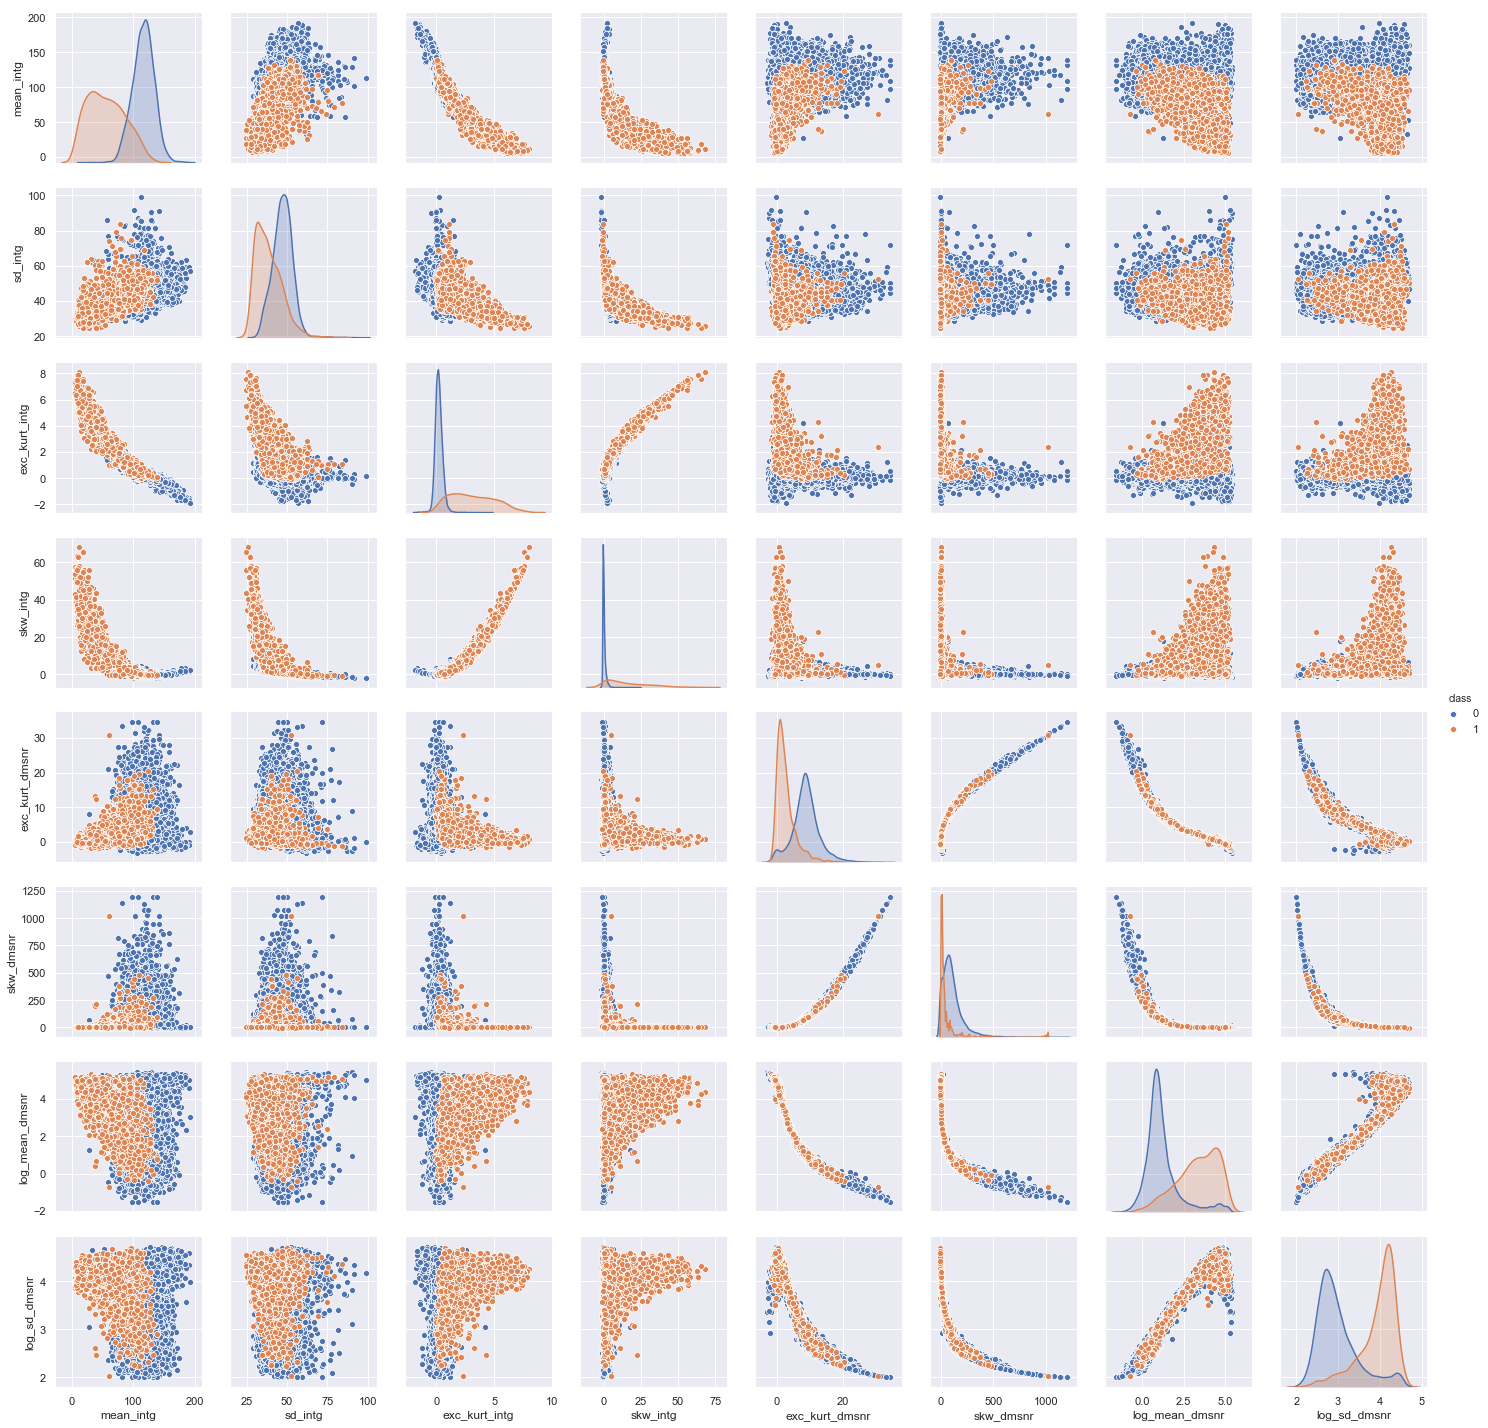

In [61]:
sns.pairplot(data = imputedPulsarDf, vars=imputedPulsarDf.drop('class', axis = 1), hue='class')

## Correlation Heat Map

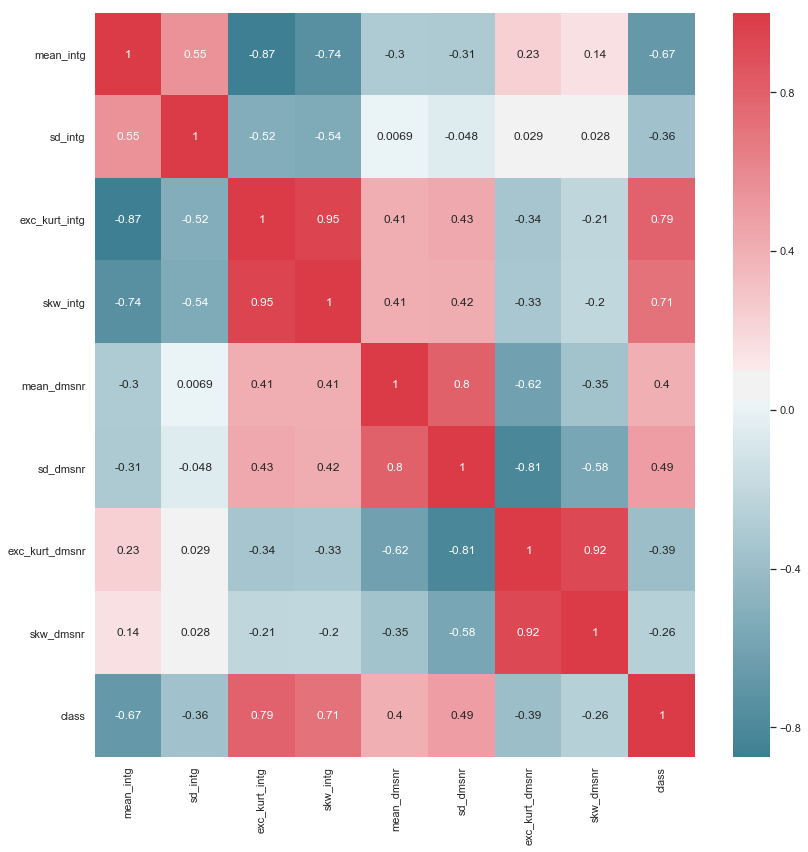

In [42]:
#Create heat map
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(pulsars_Df.corr(), cmap=sns.diverging_palette( 220 , 10 , as_cmap = True ), annot=True)
f.tight_layout()

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Standardize and Scale the dataset

scaler = StandardScaler()
scaledPulsarData = scaler.fit(imputedPulsarDf.drop("class", axis =1)).transform(imputedPulsarDf.drop("class", axis =1))


In [70]:
# Perform PCA and plot Scree plot

# initially set n_compoments = no of features and later look at variance explained in Scree plot
# To choose number of PCA components 

pca = PCA(n_components=8)
X_pca = pca.fit(scaledPulsarData).transform(scaledPulsarData)
print(scaledPulsarData.shape)
print(X_pca.shape)

(17898, 8)
(17898, 8)


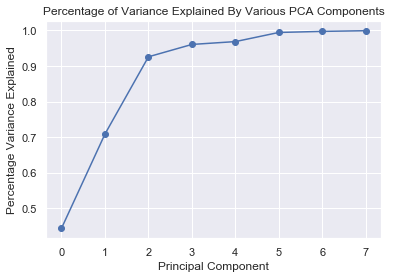

In [81]:
# Scree Plot
plt.plot(list(1 - pca.explained_variance_ratio_),'-o')
plt.title('Percentage of Variance Explained By Various PCA Components')
plt.ylabel('Percentage Variance Explained')
plt.xlabel('Principal Component')
plt.show()

In [79]:
sum(list(pca.explained_variance_ratio_)[:5])

0.991291542821075